In [2]:

import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
model = hub.KerasLayer("https://www.kaggle.com/models/vaishaknair456/u2-net-portrait-background-remover/tensorFlow2/40_saved_model/1")

In [5]:

def get_image_from_path(file_path, read_flag=cv2.IMREAD_COLOR):
    image = cv2.imread(file_path, read_flag)
    return image

In [6]:

INPUT_IMG_HEIGHT = 512
INPUT_IMG_WIDTH = 512


In [7]:

image = get_image_from_path("temp_img.jpg")   
h, w, channel_count = image.shape

In [9]:
x = cv2.resize(image, (INPUT_IMG_WIDTH, INPUT_IMG_HEIGHT)) 
x = x / 255.0
x = x.astype(np.float32)
x = np.expand_dims(x, axis=0)

In [10]:
probability = model(x)[0].numpy()

In [11]:
probability = cv2.resize(probability, dsize=(w, h))  
probability = np.expand_dims(probability, axis=-1)

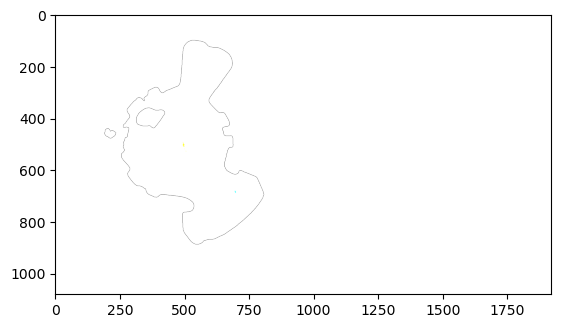

In [17]:




image = get_image_from_path("temp_img.jpg")  
h, w, channel_count = image.shape


x = cv2.resize(image, (INPUT_IMG_WIDTH, INPUT_IMG_HEIGHT)) 
x = x / 255.0
x = x.astype(np.float32)
x = np.expand_dims(x, axis=0)


probability = model(x)[0].numpy()

probability = cv2.resize(probability, dsize=(w, h))  
probability = np.expand_dims(probability, axis=-1)  

alpha_image = np.insert(image, 3, 255.0, axis=2)

PROBABILITY_THRESHOLD = 0.7  

masked_image = np.where(probability > PROBABILITY_THRESHOLD, alpha_image, 0.0)


plt.imshow(masked_image,cmap="gray")

